# 1. Problema

Clasificar si una persona tiene obesidad según sus hábitos alimenticios y nivel de actividad física.

# 2. Set de datos después de la limpieza

La información recolectada se encuentra en un archivo CSV (`dataset_obesity_clean.csv`) con 2087 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ('Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I' Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III' que representan los niveles de obesidad). Las columnas son:

1. 'Gender'
2. 'Age'
3. 'Height'
4. 'Weight'
5. 'family_history_with_overweight'
6. 'FAVC'
7. 'FCVC'
8. 'NCP'
9. 'CAEC'
10. 'SMOKE'
11. 'CH2O'
12. 'SCC'
13. 'FAF'
14. 'TUE'
15. 'CALC'
16. 'MTRANS'
17. 'NObeyesdad'

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

# 3. Lectura del dataset

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ruta = '../1_data/dataset_obesity_clean.csv'
data = pd.read_csv(ruta, index_col=0)

In [4]:
print(data.shape)
data.head()

(2087, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



# 4. Análisis Exploratorio

## 4.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

<Axes: >

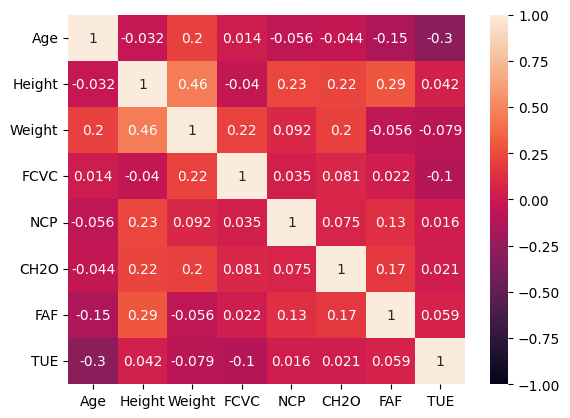

In [6]:
cols_num = data.select_dtypes(exclude=['object']).columns # Selecciona las columnas no object
corr_matrix = data[cols_num].corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

In [7]:
corr_matrix

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.031748,0.198160,0.013572,-0.055823,-0.044058,-0.148202,-0.302927
Height,-0.031748,1.000000,0.457468,-0.040363,0.227806,0.220487,0.293584,0.041808
Weight,0.198160,0.457468,1.000000,0.216574,0.092149,0.203823,-0.056490,-0.079351
FCVC,0.013572,-0.040363,0.216574,1.000000,0.034885,0.081332,0.022003,-0.104128
NCP,-0.055823,0.227806,0.092149,0.034885,1.000000,0.075335,0.127816,0.015693
CH2O,-0.044058,0.220487,0.203823,0.081332,0.075335,1.000000,0.165310,0.020704
FAF,-0.148202,0.293584,-0.056490,0.022003,0.127816,0.165310,1.000000,0.058716
TUE,-0.302927,0.041808,-0.079351,-0.104128,0.015693,0.020704,0.058716,1.000000


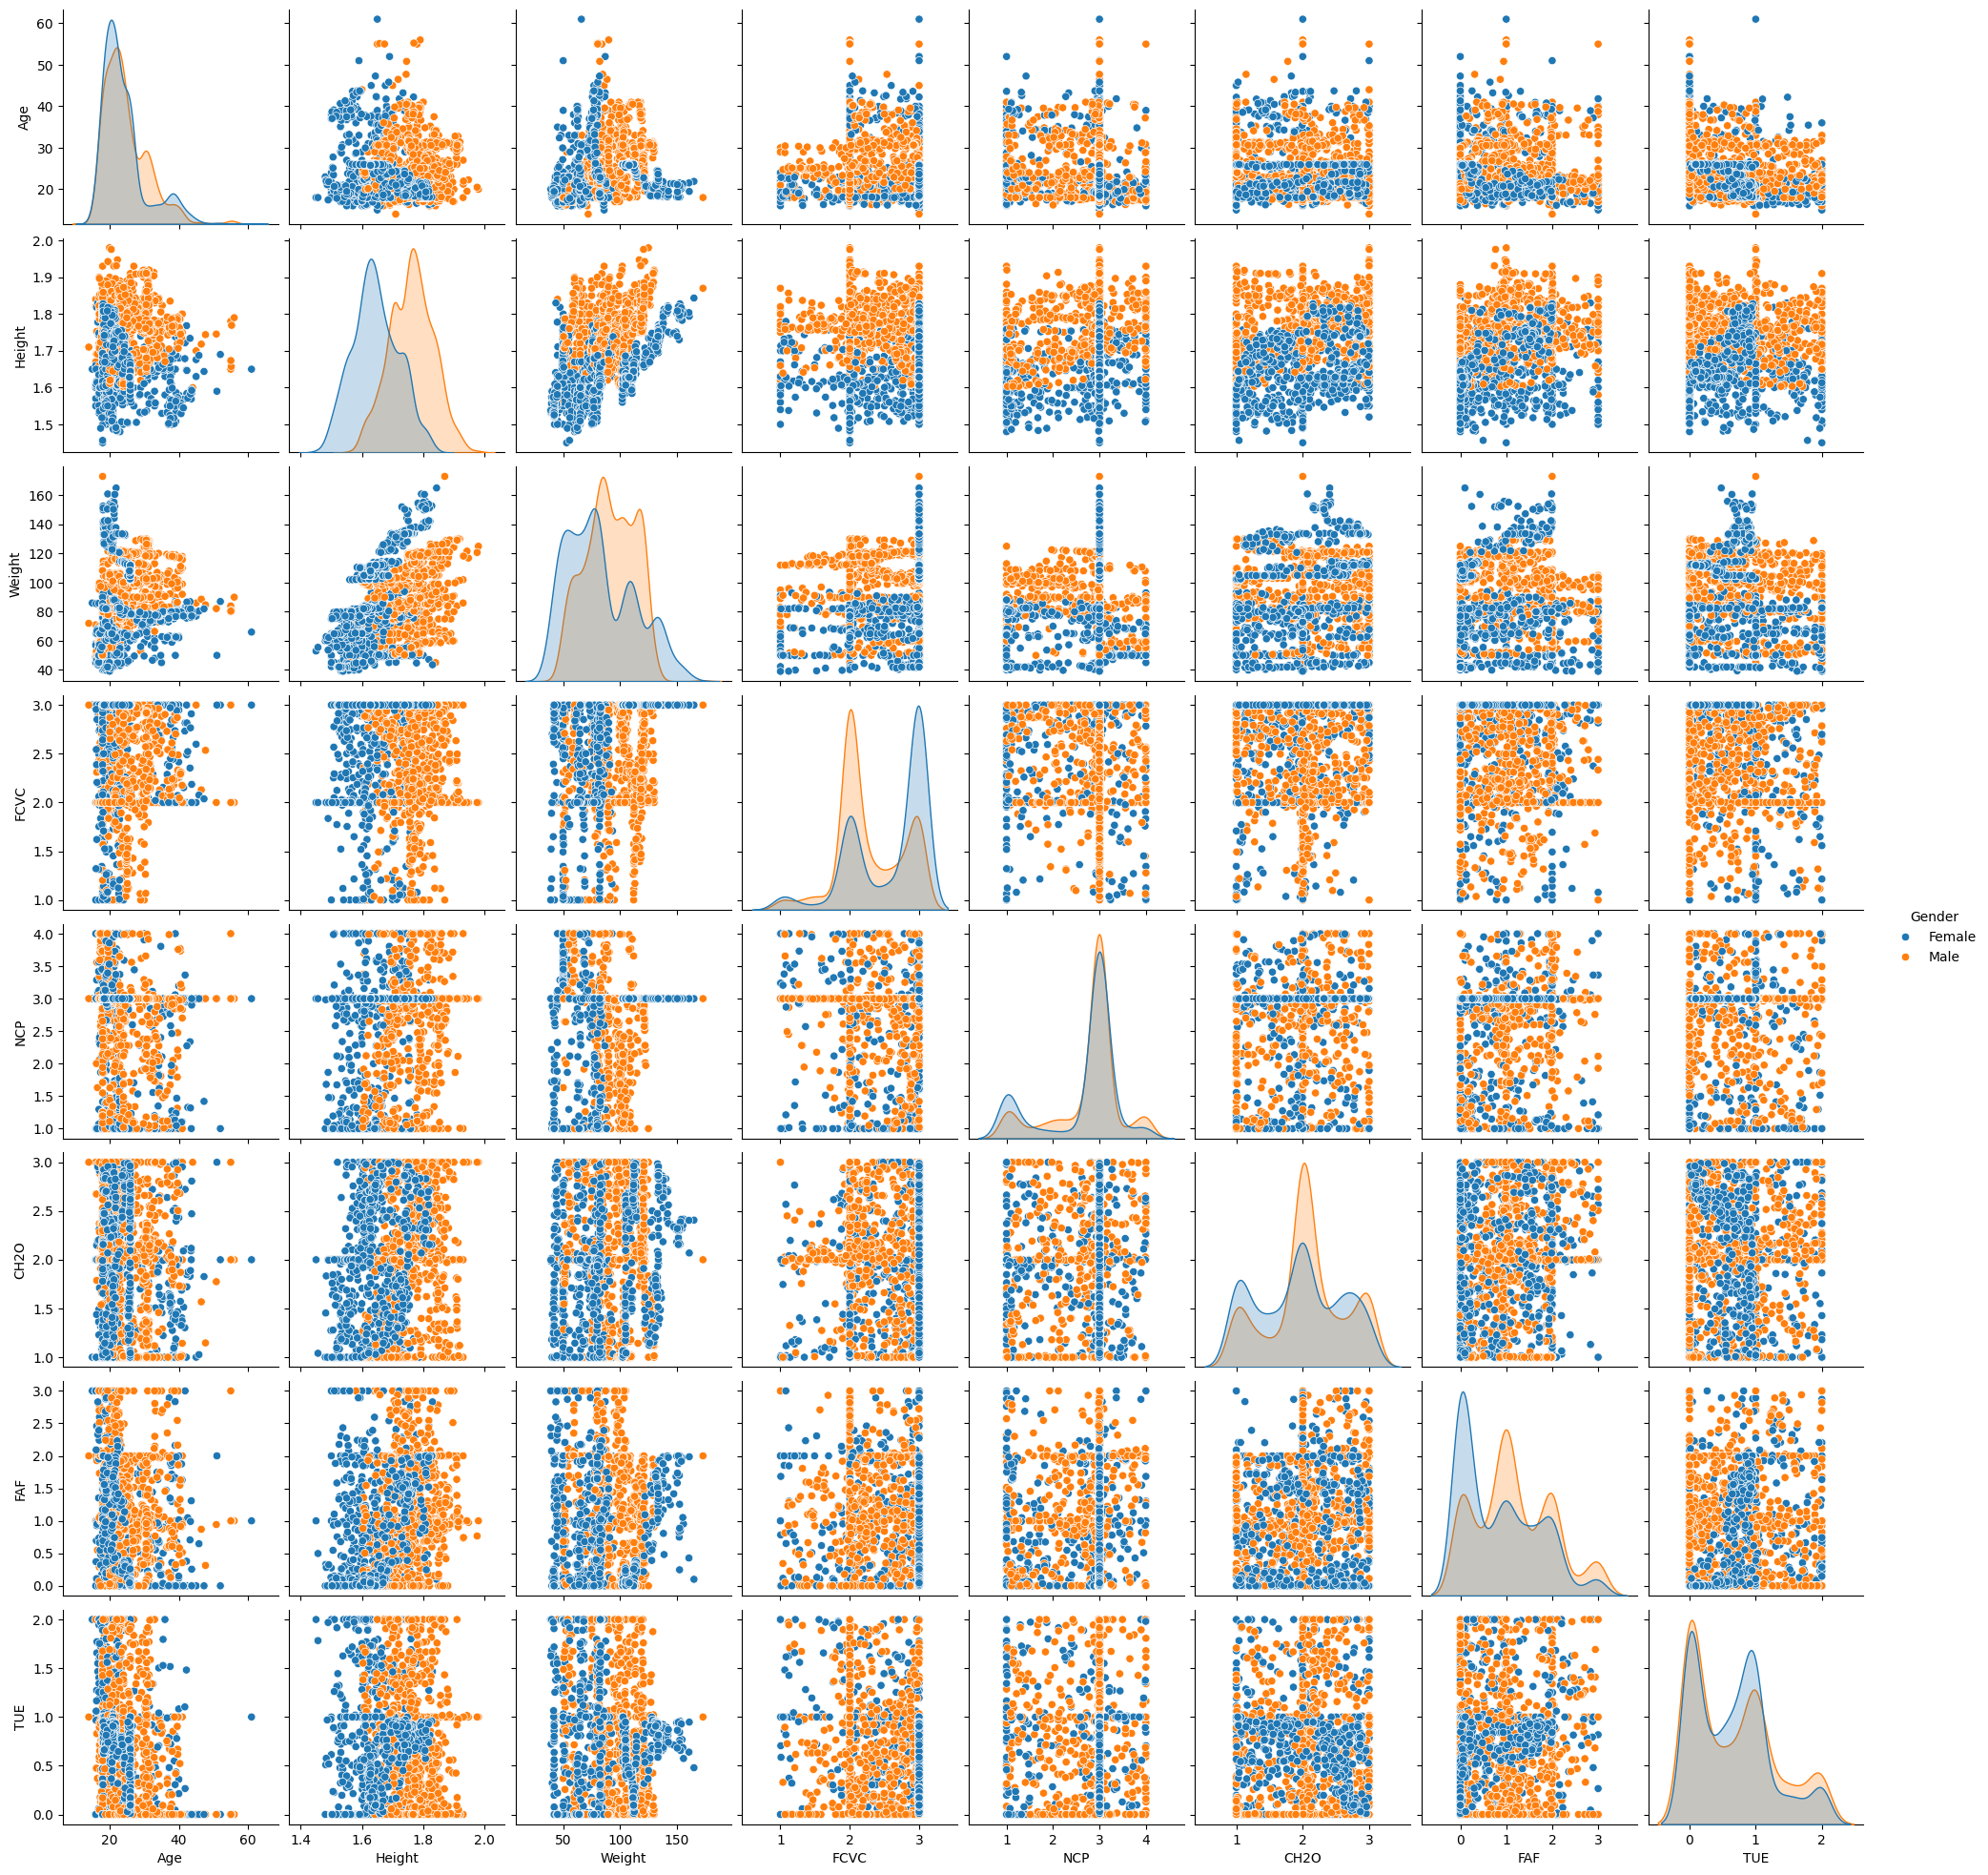

In [8]:
sns.pairplot(data, hue='Gender')

/var/folders/q7/h46b93yn785_qrccjg33gkqw0000gn/T/ipykernel_47737/1081789885.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/var/folders/q7/h46b93yn785_qrccjg33gkqw0000gn/T/ipykernel_47737/1081789885.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/var/folders/q7/h46b93yn785_qrccjg33gkqw0000gn/T/ipykernel_47737/1081789885.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/var/folders/q7/h46b93yn785_qrccjg33gkqw0000gn/T/ipykernel_47737/1081789885.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

Columna Gender: ['Female' 'Male'] - 2 subniveles
Columna family_history_with_overweight: ['yes' 'no'] - 2 subniveles
Columna FAVC: ['no' 'yes'] - 2 subniveles
Columna CAEC: ['Sometimes' 'Frequently' 'Always' 'no'] - 4 subniveles
Columna SMOKE: ['no' 'yes'] - 2 subniveles
Columna SCC: ['no' 'yes'] - 2 subniveles
Columna CALC: ['no' 'Sometimes' 'Frequently' 'Always'] - 4 subniveles
Columna MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] - 5 subniveles
Columna NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] - 7 subniveles


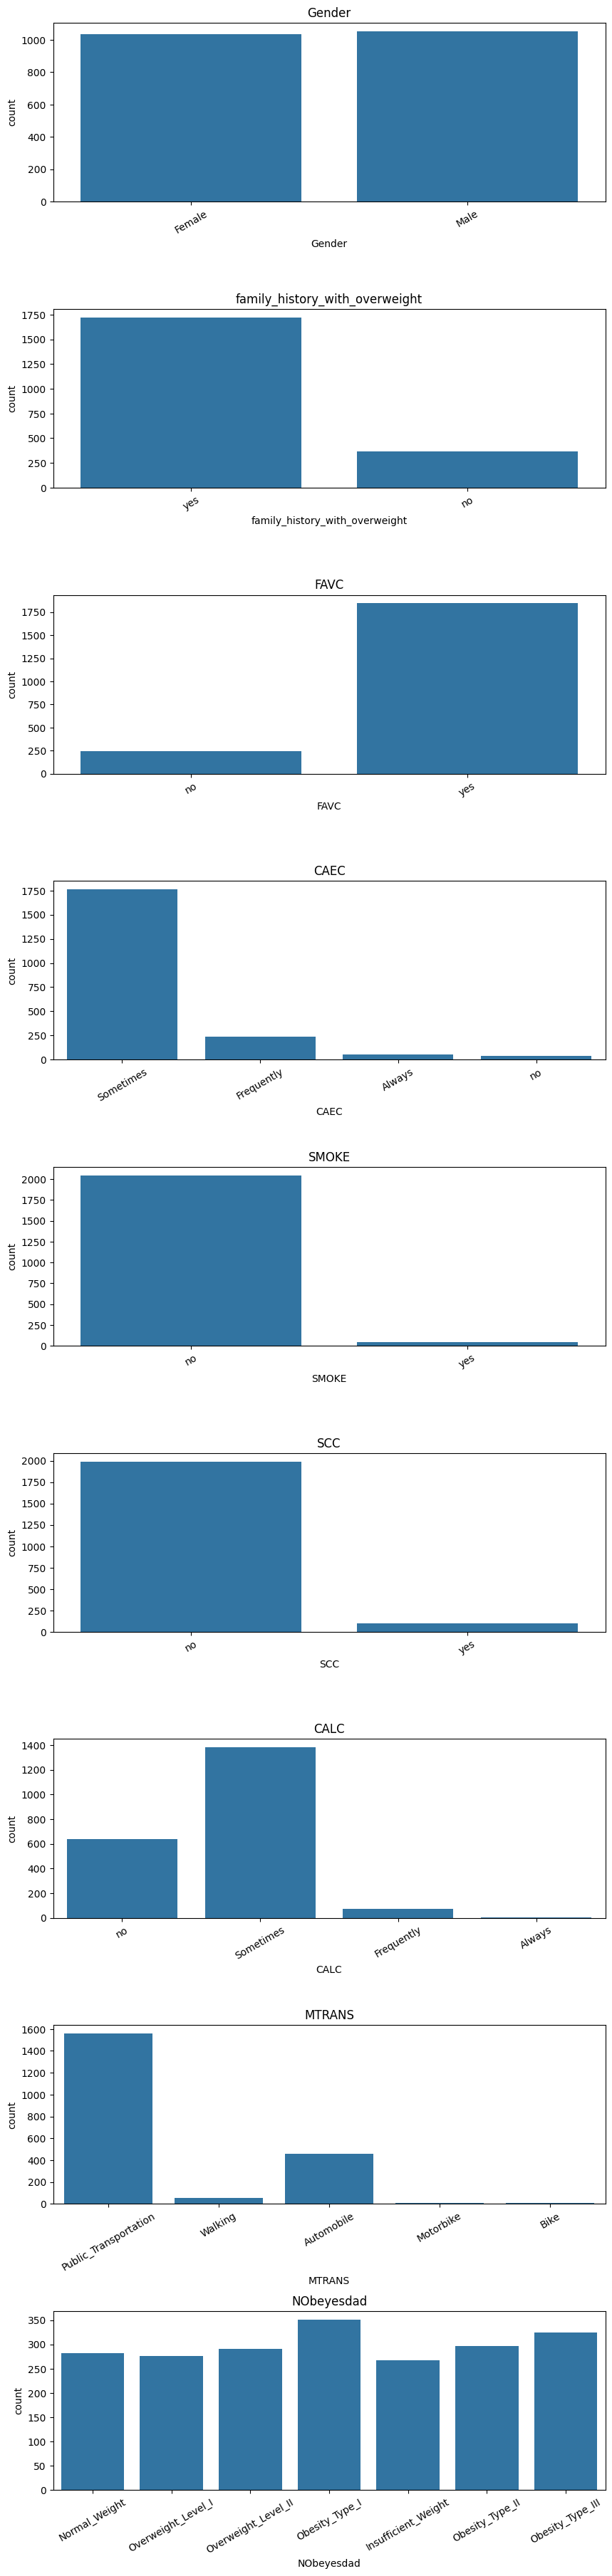

In [9]:
# Tomemos las variables categóricas y generemos gráficos de barras
col_cat = data.select_dtypes(include=['object']).columns

# Gráfico de Barras de Conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.6)
# fig.tight_layout()

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
    
    print(f'Columna {col}: {data[col].unique()} - {data[col].nunique()} subniveles')

In [10]:
data.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)